# BL40A2010 Introduction to IoT-Based Systems

## Assignment 5, 21.2.2023

### Author: Touko Tikkanen

In [ ]:
# installations
! pip install scikit-dsp-comm
! pip install --upgrade numpy
! pip install --upgrade matplotlib
! pip install --upgrade networkx

import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import binom
import networkx as nx 
style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

**(1) Create two arrays with 10000 samples generated as [Binomial](https://en.wikipedia.org/wiki/Binomial_distribution) random variables via [Numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html) similar to what we have done with Poisson random variables in the tutorial considering the following paramenters of the Binomial function:**

**(a) $n=100$ and $p=0.3$;**

**(b) $n=10000$, and $p=0.6$**


**Make the histogram (empirical) plots related to each vector and compare them with the analytical results with the probability distribution funtion given by:**

**$$\mathrm{Prob}\left[X = k \right] = \binom{n}{k}p^k(1-p)^{n-k},$$ where $k$ is the number of *successes* in $n$ trials.**

**Remember to use this [scipy.stats.binom](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html) in a similar way we did in the tutorial with Poisson.**

In [2]:
n_a = 100; p_a = 0.3;
n_b = 10000; p_b = 0.6;
samples = 10000;

samples_a = np.random.binomial(n_a, p_a, samples);
samples_b = np.random.binomial(n_b, p_b, samples);

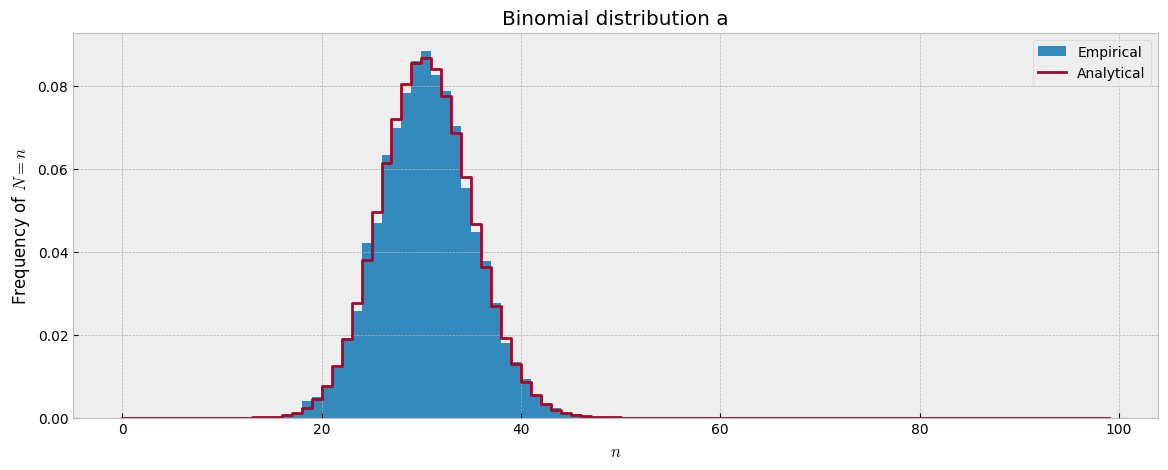

In [3]:
n = np.arange(n_a)

n_bins_a = np.max(samples_a) - np.min(samples_a)


plt.figure(figsize=(14,5))
plt.hist(samples_a, n_bins_a, density=True, label='Empirical')
plt.step(n, binom.pmf(n, n_a, p_a), where='post', label='Analytical')

plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Binomial distribution a')

plt.legend()
plt.show() 

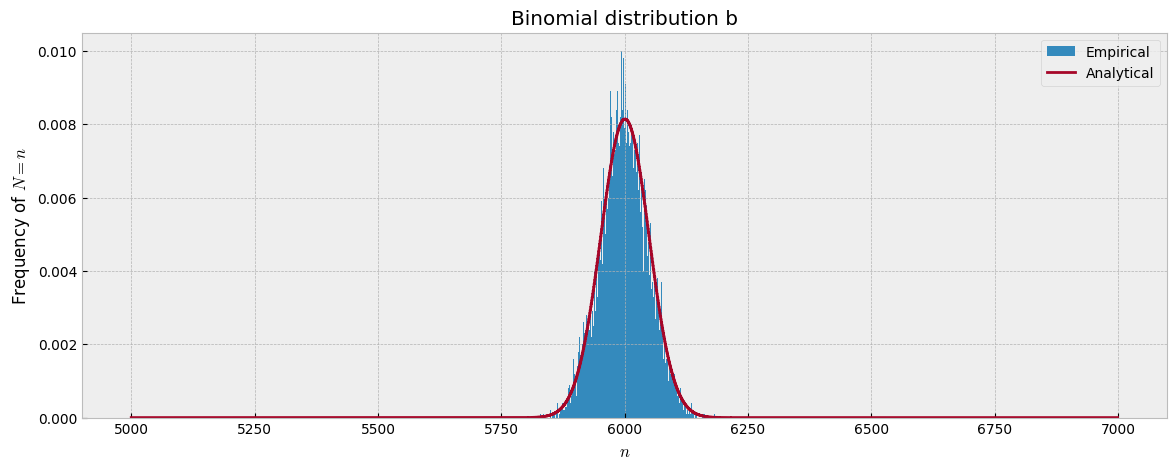

In [5]:
n = np.arange(5000,7000)

n_bins_b = np.max(samples_b) - np.min(samples_b)


plt.figure(figsize=(14,5))
plt.hist(samples_b, n_bins_b, density=True, label='Empirical')
plt.step(n, binom.pmf(n, n_b, p_b), where='post', label='Analytical')

plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Binomial distribution b')

plt.legend()
plt.show() 

The empirical distributions align with the analytical ones fairly well. Of course, drawing from them randomly will lead to the bins not following the analytical curve perfectly.

**(2) Read Section 2.3 and Chapter 3 from [Network Science](http://networksciencebook.com/) and generate three different kinds of Erdos-Renyi graphs with $N=15$ (fifteen nodes) using [NetworkX](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html?highlight=erdos#networkx.generators.random_graphs.erdos_renyi_graph). 
The networks shall be (a)  with probability $p=0.2$, (b) with probability $p=0.5$ and (c) with probability $p=0.8$. What are the differences you see if these graphs represent communication networks.**

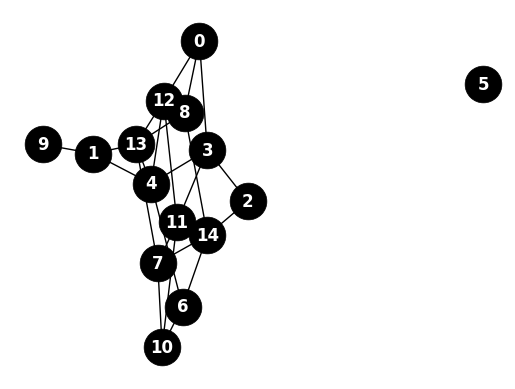

In [12]:
N = 15;
p1 = 0.2;

G1 = nx.erdos_renyi_graph(N, p1, directed=False)

nx.draw_networkx(G1, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

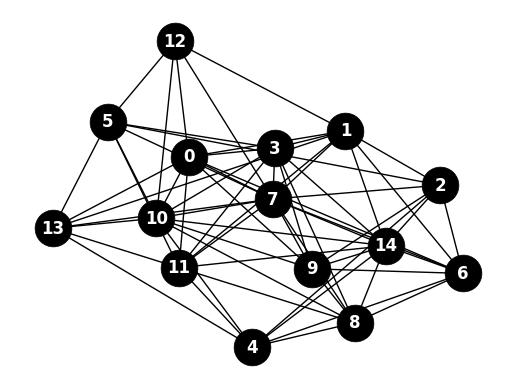

In [13]:
p2 = 0.5;
G2 = nx.erdos_renyi_graph(N, p2, directed=False)

nx.draw_networkx(G2, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

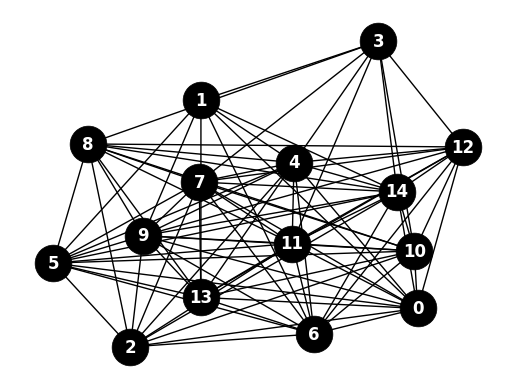

In [14]:
p3 = 0.8;
G3 = nx.erdos_renyi_graph(N, p3, directed=False)

nx.draw_networkx(G3, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

In [31]:
print("G1:")
print("Node degrees: ", G1.degree)
print("Edges: ", nx.number_of_edges(G1))
print("Clustering coefficients: ", nx.clustering(G1))

print("---------------------------------------")
print("G2:")
print("Node degrees: ", G2.degree)
print("Edges: ", nx.number_of_edges(G2))
print("Clustering coefficients: ", nx.clustering(G2))

print("---------------------------------------")
print("G3:")
print("Node degrees: ", G3.degree)
print("Edges: ", nx.number_of_edges(G3))
print("Clustering coefficients: ", nx.clustering(G3))

G1:
Node degrees:  [(0, 3), (1, 3), (2, 2), (3, 4), (4, 5), (5, 0), (6, 3), (7, 4), (8, 4), (9, 1), (10, 3), (11, 4), (12, 5), (13, 5), (14, 4)]
Edges:  25
Clustering coefficients:  {0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0, 3: 0, 4: 0.2, 5: 0, 6: 0, 7: 0.16666666666666666, 8: 0.3333333333333333, 9: 0, 10: 0.3333333333333333, 11: 0.16666666666666666, 12: 0.3, 13: 0.3, 14: 0}
---------------------------------------
G2:
Node degrees:  [(0, 9), (1, 9), (2, 7), (3, 9), (4, 7), (5, 7), (6, 8), (7, 13), (8, 8), (9, 8), (10, 10), (11, 9), (12, 5), (13, 7), (14, 10)]
Edges:  63
Clustering coefficients:  {0: 0.5833333333333334, 1: 0.5555555555555556, 2: 0.5714285714285714, 3: 0.6666666666666666, 4: 0.5238095238095238, 5: 0.5238095238095238, 6: 0.6428571428571429, 7: 0.5512820512820513, 8: 0.7142857142857143, 9: 0.7142857142857143, 10: 0.5333333333333333, 11: 0.5833333333333334, 12: 0.7, 13: 0.6190476190476191, 14: 0.6444444444444445}
---------------------------------------
G3:
Node de

The first graph is generated with the probability 0.2 of each edge existing. Therefore the node degrees are low, with node 5 not being connected to any other node for example. The clustering coefficients are likely to be low, making the network easy to compromise. 

It follows that the graphs with higher probability have more edges, higher node degrees and higher clustering coefficients. It gets much less likely that any node would be completely disconnected from other nodes, but the large amount of edges could easily lead to confusion in communication.